In [ ]:
import cv2
!pip install Pillow
!sudo apt install tesseract-ocr
!pip install pytesseract
from PIL import ImageEnhance, ImageFilter, Image
import pytesseract as ts
from google.colab.patches import cv2_imshow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
with open('/content/gdrive/My Drive/TTG/nlp_trained.h5', 'w') as f:
  print(f.read())

UnsupportedOperation: ignored

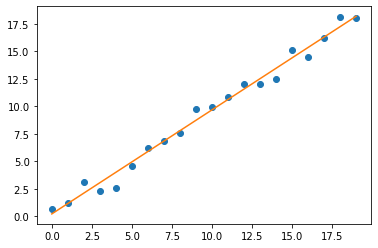

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
f = plt.figure()
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

f.savefig( "/content/gdrive/My Drive/TTG/test.png")

In [ ]:
import os
print( os.getcwd() )
print( os.listdir() )

/content
['.config', 'test.png', 'photo.jpg', 'gdrive', 'sample_data']


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


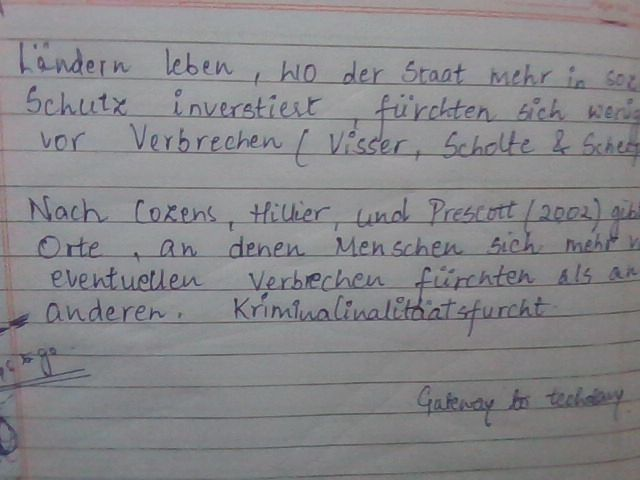

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
 img = cv2.imread('photo.jpg',)
 text = ts.image_to_string(img)     #printing realtime text
 print(text)


 

nae ae
Bruin bryererienl vclten. fich
| voy Verbrechen Ease

 

 



In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString(text)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1HWbKXw6r-q3Sso4prVmW0PqhTDushlOW


In [ ]:
uploaded

GoogleDriveFile({'title': 'Sample file.txt', 'mimeType': 'text/plain', 'kind': 'drive#file', 'id': '1HWbKXw6r-q3Sso4prVmW0PqhTDushlOW', 'etag': '"MTYxMTc0NjA3OTI1OQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1HWbKXw6r-q3Sso4prVmW0PqhTDushlOW', 'webContentLink': 'https://drive.google.com/uc?id=1HWbKXw6r-q3Sso4prVmW0PqhTDushlOW&export=download', 'alternateLink': 'https://drive.google.com/file/d/1HWbKXw6r-q3Sso4prVmW0PqhTDushlOW/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1HWbKXw6r-q3Sso4prVmW0PqhTDushlOW/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/plain', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-01-27T11:14:39.259Z', 'modifiedDate': '2021-01-27T11:14:39.259Z', 'modifiedByMeDate': '2021-01-27T11:14:39.259Z', 'lastViewedByMeDate': '2021-01-27T11:14:39.259Z', 'markedViewedByMeDate': '

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1HWbKXw6r-q3Sso4prVmW0PqhTDushlOW'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content " 

nae ae
Bruin bryererienl vclten. fich
| voy Verbrechen Ease

 

 
"
